In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import randn,nn

In [ ]:
batch_s = 256

In [ ]:
def linear_function(x):
  return 3*x + 1

def quadritic_function(x):
  return 5*x*x + 3*x + 1

def cubic_function(x):
  return 7*x*x*x + 5*x*x + 3*x + 1

In [ ]:
def data_generation(kind='linear'):
  data = []
  x = 20*randn(batch_s)
  for i in range(batch_s):
    if kind=='linear':
      y = linear_function(x[i])
    elif kind=='quad':
      y = quadritic_function(x[i])
    else:
      y = cubic_function(x[i])
    data.append([x[i], y])
  return torch.FloatTensor(data)

In [ ]:
linear_data = data_generation()
quad_data = data_generation('quad')
cubic_data = data_generation('cubic')

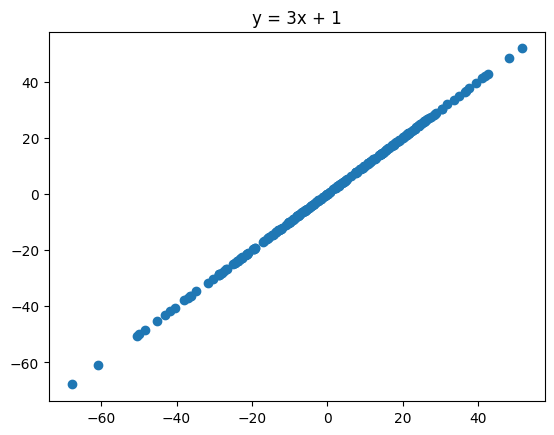

In [ ]:
plt.scatter(linear_data[:,0], linear_data[:,0])
plt.title('y = 3x + 1')
plt.show()

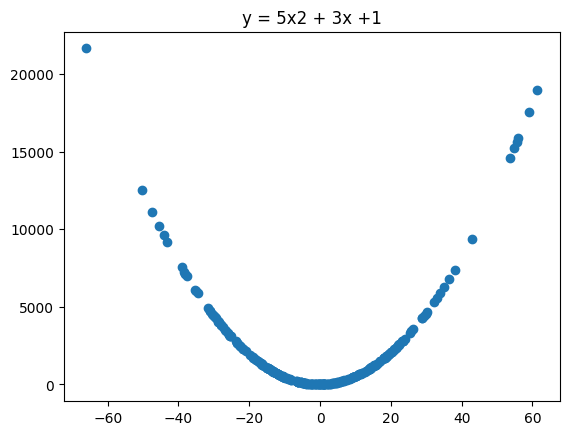

In [ ]:
plt.scatter(quad_data[:,0], quad_data[:,1])
plt.title('y = 5x2 + 3x +1')
plt.show()

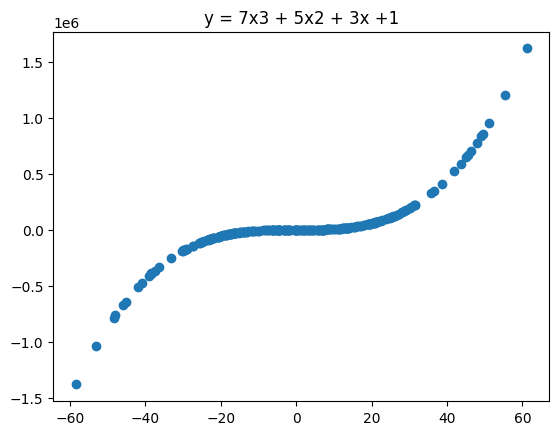

In [ ]:
plt.scatter(cubic_data[:,0], cubic_data[:,1])
plt.title('y = 7x3 + 5x2 + 3x +1')
plt.show()

In [ ]:
def real_data(kind='linear'):
  return torch.concat((data_generation(kind),torch.ones(batch_s,1)),axis=1)

In [ ]:
def fake_data():
  pointx = 20*randn(batch_s)
  pointy = randn(batch_s)
  points = [[pointx[i],pointy[i]] for i in range(batch_s)]
  points = torch.FloatTensor(points)
  return torch.concat((points, torch.zeros(batch_s,1)),axis=1)

In [ ]:
def weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Linear') != -1:
    nn.init.normal_(m.weight.data, 0.0, 0.02)

In [ ]:
def generate_noise_data(latent_dim=4, batch_size=batch_s):
  points = randn((batch_size,latent_dim))
  # return torch.reshape(points,(batch_size,latent_dim))
  return points

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,num_inputs):
    super().__init__()
    self.conv = nn.Sequential(
      nn.Linear(num_inputs,10),
      nn.ReLU(),
      nn.Linear(10,out_features=1),
      nn.Sigmoid()
    )

  def forward(self,x):
    return self.conv(x)

In [ ]:
class Generator(nn.Module):
  def __init__(self, num_inputs):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Linear(num_inputs,10),
        nn.SELU(),
        nn.Linear(10,2)
    )

  def forward(self,x):
    return self.conv(x)

In [ ]:
generate_noise_data().shape

torch.Size([256, 4])

In [ ]:
latent_dim = 2
g_model = Generator(latent_dim)

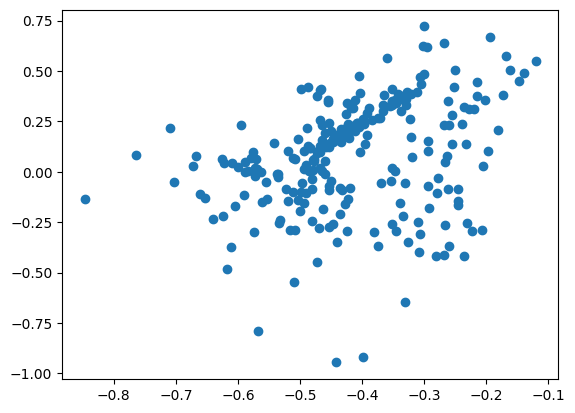

In [ ]:
fake_data = g_model(generate_noise_data(latent_dim))
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy())
plt.show()

In [ ]:
num_epochs = 7500
latent_dim = 2

d_model = Discriminator(2)
d_model.apply(weights_init)
g_model = Generator(latent_dim)
d_model.apply(weights_init)

loss = nn.BCELoss()
d_optim = torch.optim.Adam(d_model.parameters(), lr=0.001)
g_optim = torch.optim.Adam(g_model.parameters(), lr=0.001)

d_losses = []
g_losses = []

for epoch in range(num_epochs):
  real_data = data_generation()
  real_label = torch.ones(batch_s)
  latent_data = generate_noise_data(latent_dim)
  fake_data = g_model(latent_data)
  fake_label = torch.zeros(batch_s)

  data = torch.cat((real_data, fake_data),0)
  label = torch.cat((real_label, fake_label),0)

  d_model.zero_grad()
  output = d_model(data).view(-1)
  d_loss = loss(output, label)

  d_loss.backward()
  d_optim.step()

  g_model.zero_grad()
  latent_data = generate_noise_data(latent_dim)
  fake_data = g_model(latent_data)
  output = d_model(fake_data).view(-1)
  g_loss = loss(output, real_label)

  g_loss.backward()
  g_optim.step()


  d_losses.append(d_loss)
  g_losses.append(g_loss)

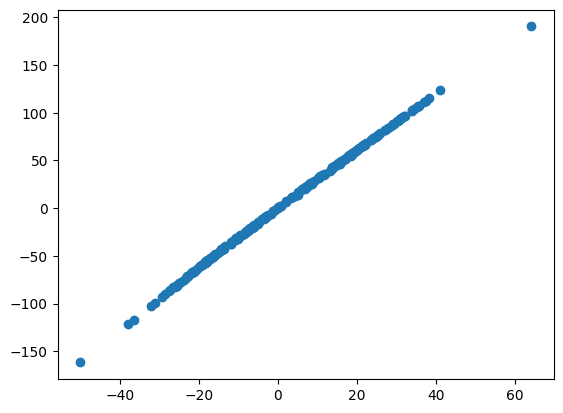

In [ ]:
fake_data = g_model(generate_noise_data(latent_dim))
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy())
plt.show()

In [ ]:
real_data = data_generation()
for _ in range(19):
  real_data = torch.cat((real_data,data_generation()),0)
real_data.shape

torch.Size([5120, 2])

In [ ]:
fake_data = g_model(generate_noise_data(latent_dim=latent_dim))
for _ in range(19):
  fake_data = torch.cat((fake_data,g_model(generate_noise_data(latent_dim=latent_dim))),0)
fake_data.shape

torch.Size([5120, 2])

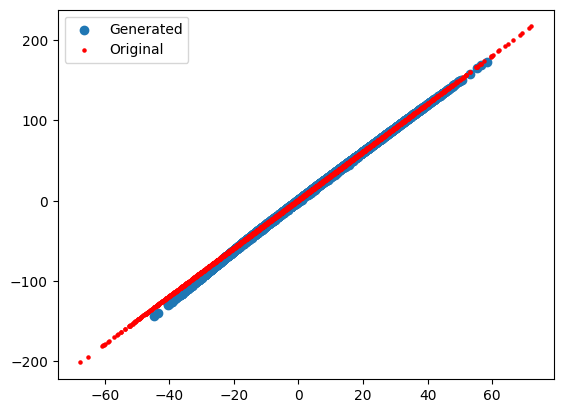

In [ ]:
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy(),label='Generated')
plt.scatter(real_data[:,0], real_data[:,1],c='r', label='Original',s=5)
plt.legend()
plt.show()

# Quadritic Data with same model but more epochs and latent dim=5


In [ ]:
class Discriminator(nn.Module):
  def __init__(self,num_inputs):
    super().__init__()
    self.conv = nn.Sequential(
      nn.Linear(num_inputs,256),
      nn.ReLU(),
      nn.Linear(256,128),
      nn.ReLU(),
      nn.Linear(128,32),
      nn.ReLU(),
      nn.Linear(32,out_features=1),
      nn.Sigmoid()
    )

  def forward(self,x):
    return self.conv(x)

In [ ]:
class Generator(nn.Module):
  def __init__(self, num_inputs):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Linear(num_inputs,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.SELU(),
        nn.Linear(32,2)
    )

  def forward(self,x):
    return self.conv(x)

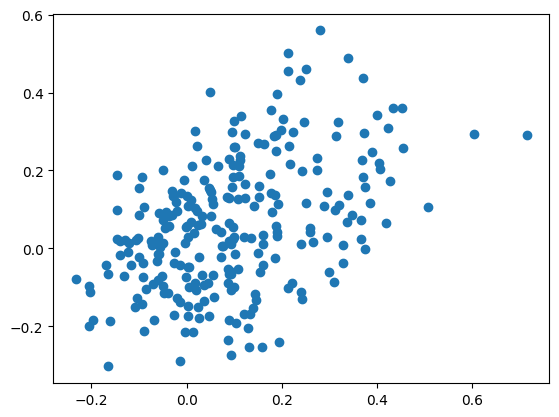

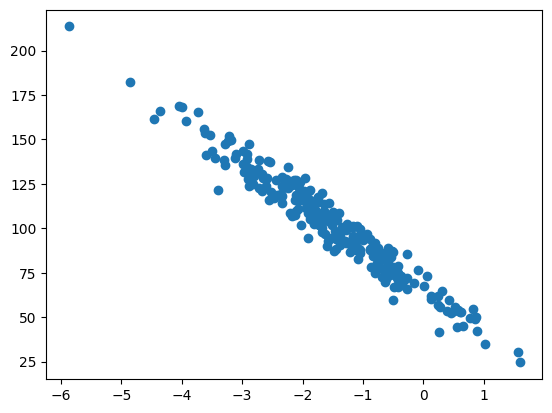

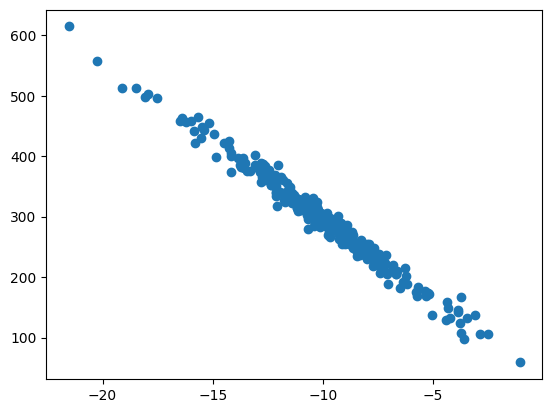

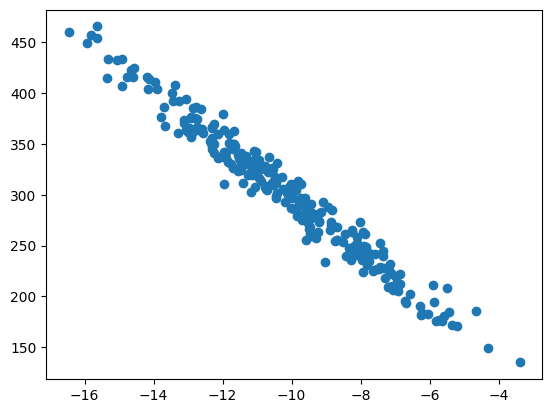

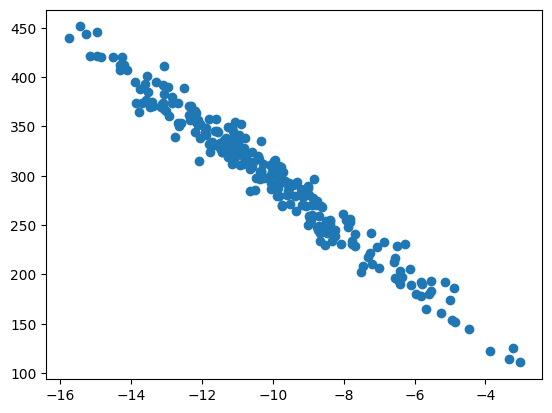

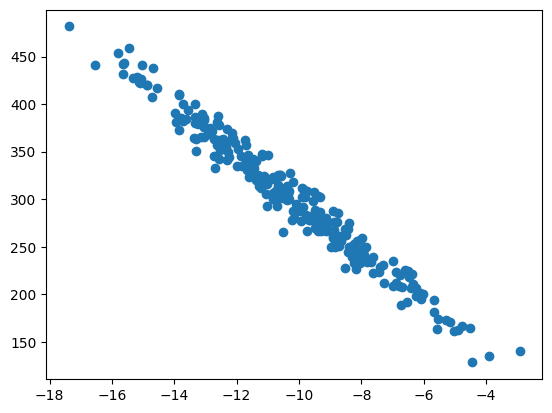

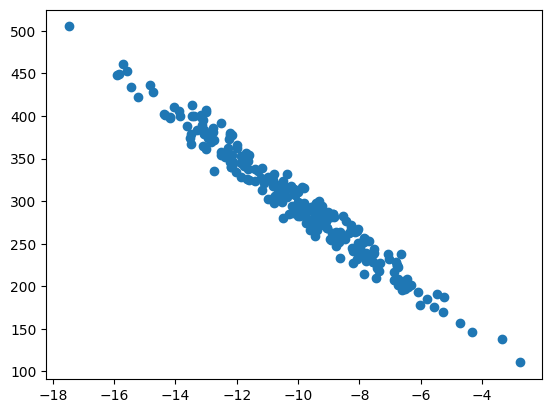

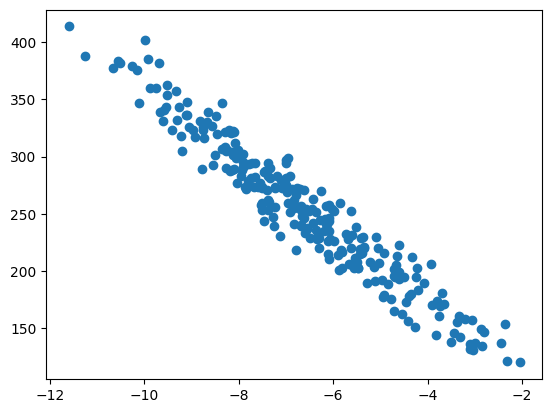

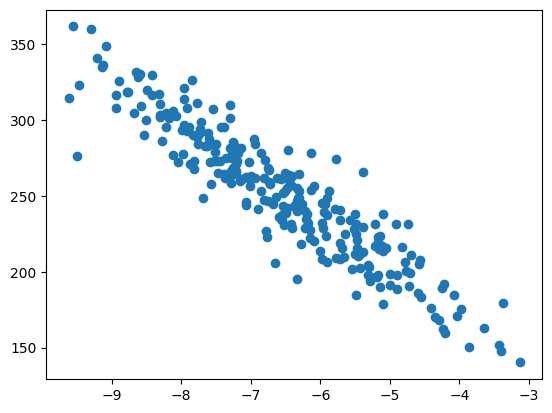

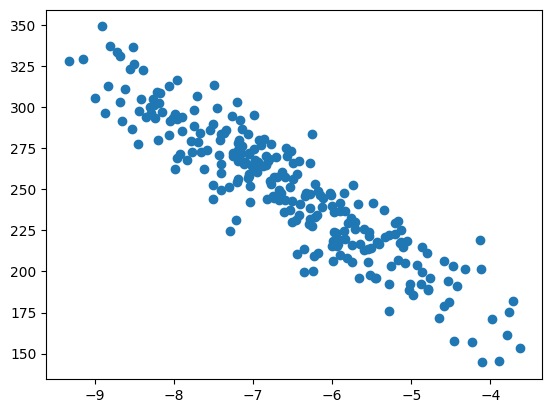

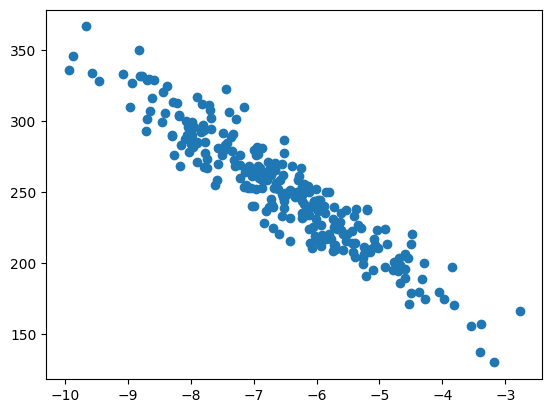

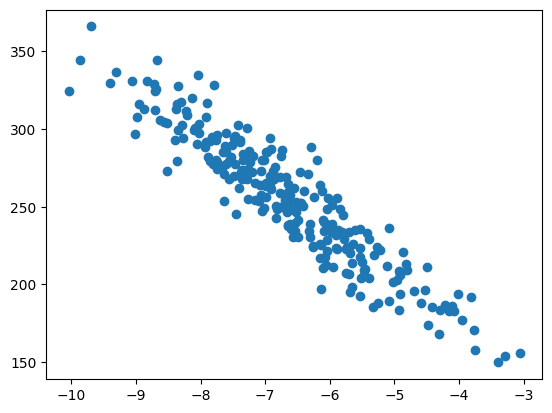

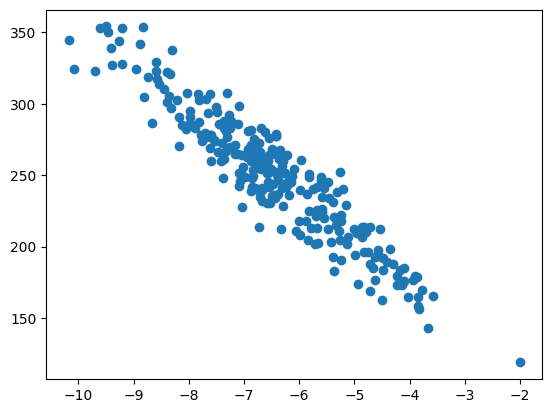

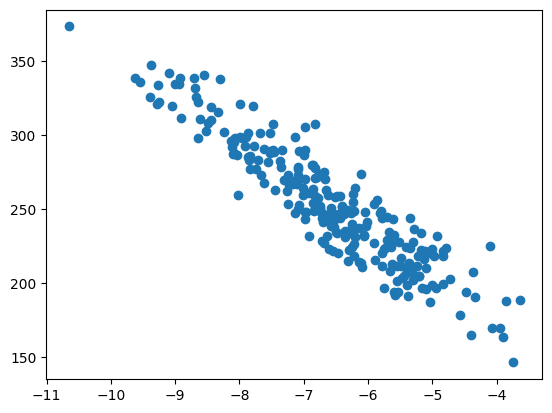

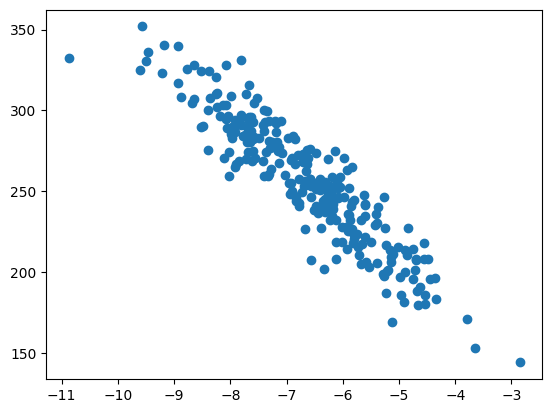

In [ ]:
num_epochs = 15000
latent_dim = 8
qd_model = Discriminator(2)
qd_model.apply(weights_init)
qg_model = Generator(latent_dim)
qg_model.apply(weights_init)
loss = nn.BCELoss()
d_optim = torch.optim.Adam(qd_model.parameters(), lr=0.001)
g_optim = torch.optim.Adam(qg_model.parameters(), lr=0.001)

d_losses = []
g_losses = []

for epoch in range(num_epochs):
  real_data = data_generation('quad')
  real_label = torch.ones(batch_s)
  latent_data = generate_noise_data(latent_dim)
  fake_data = qg_model(latent_data).detach()
  fake_label = torch.zeros(batch_s)

  data = torch.cat((real_data, fake_data),0)
  label = torch.cat((real_label, fake_label),0)

  qd_model.zero_grad()
  output = qd_model(data).view(-1)
  d_loss = loss(output, label)

  d_loss.backward()
  d_optim.step()

  qg_model.zero_grad()
  #latent_data = generate_noise_data(latent_dim)
  fake_data = qg_model(latent_data)
  output = qd_model(fake_data).view(-1)
  g_loss = loss(output, real_label)
  # kl = kl_loss(fake_data, real_data)
  # final_loss = g_loss+kl
  # final_loss.backward()
  g_loss.backward()

  g_optim.step()
  if epoch%1000==0:
    plot_data = qg_model(generate_noise_data(latent_dim=latent_dim))
    plt.scatter(real_data[:,0], real_data[:,1],c='r', label='Original')
    plt.scatter(plot_data[:,0].detach().numpy(), plot_data[:,1].detach().numpy())
    plt.show()

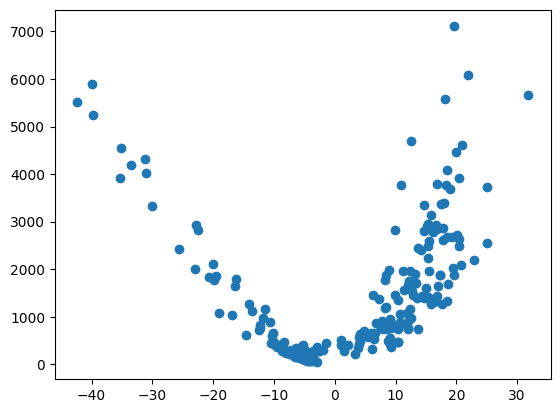

In [ ]:
fake_data = qg_model(generate_noise_data(latent_dim=latent_dim))
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy())
plt.show()

In [ ]:
real_data = data_generation('quad')
for _ in range(19):
  real_data = torch.cat((real_data,data_generation('quad')),0)
real_data.shape

torch.Size([5120, 2])

In [ ]:
fake_data = qg_model(generate_noise_data(latent_dim=latent_dim))
for _ in range(19):
  fake_data = torch.cat((fake_data,qg_model(generate_noise_data(latent_dim=latent_dim))),0)
fake_data.shape

torch.Size([5120, 2])

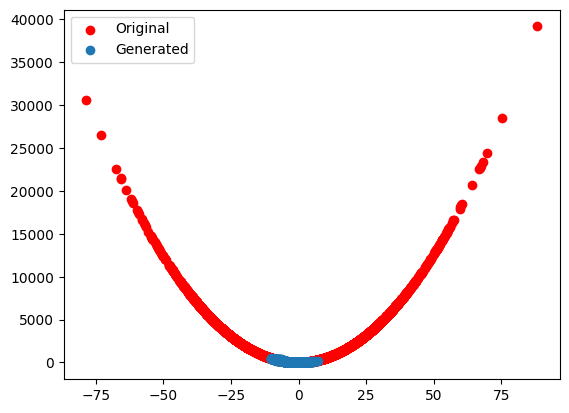

In [ ]:
plt.scatter(real_data[:,0], real_data[:,1],c='r', label='Original')
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy(),label='Generated')
plt.legend()
plt.show()

# Cubic

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,num_inputs):
    super().__init__()
    self.conv = nn.Sequential(
      nn.Linear(num_inputs,256),
      nn.ReLU(),
      nn.Linear(256,128),
      nn.ReLU(),
      nn.Linear(128,32),
      nn.ReLU(),
      nn.Linear(32,out_features=1),
      nn.Sigmoid()
    )

  def forward(self,x):
    return self.conv(x)

In [ ]:
class Generator(nn.Module):
  def __init__(self, num_inputs):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Linear(num_inputs,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.PReLU(),
        nn.Linear(32,2)
    )

  def forward(self,x):
    return self.conv(x)

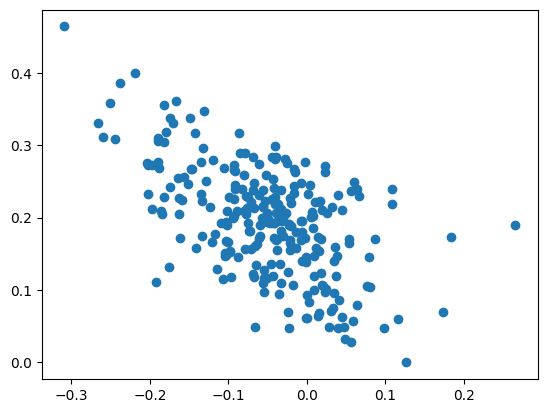

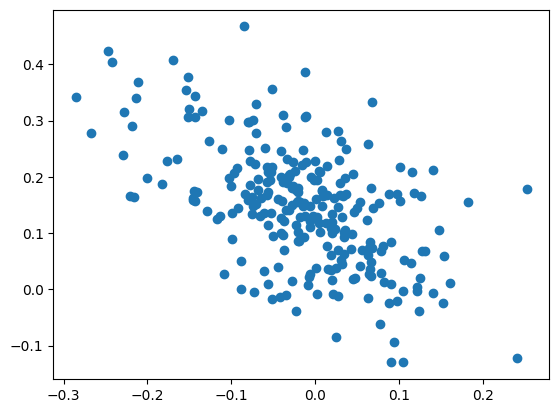

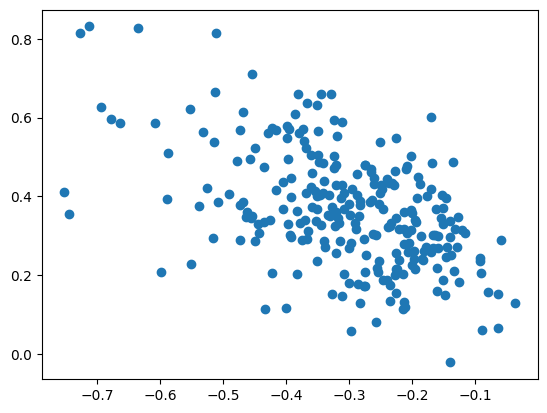

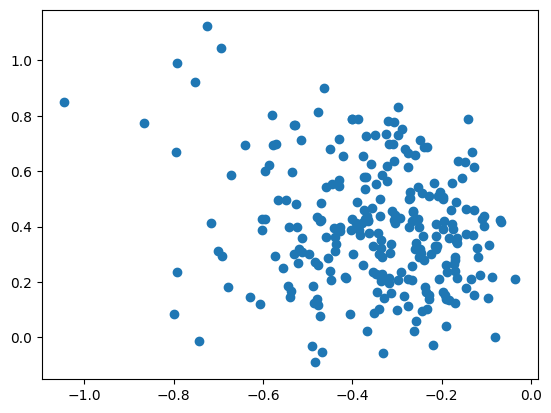

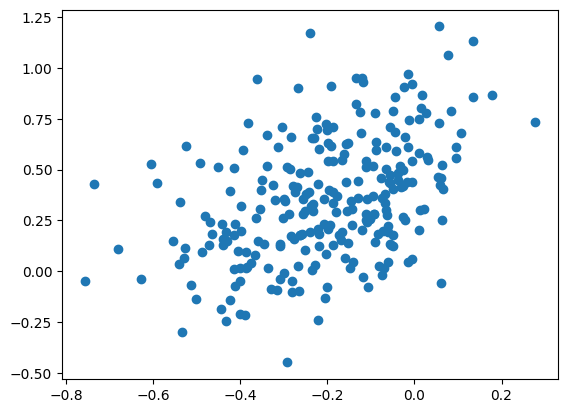

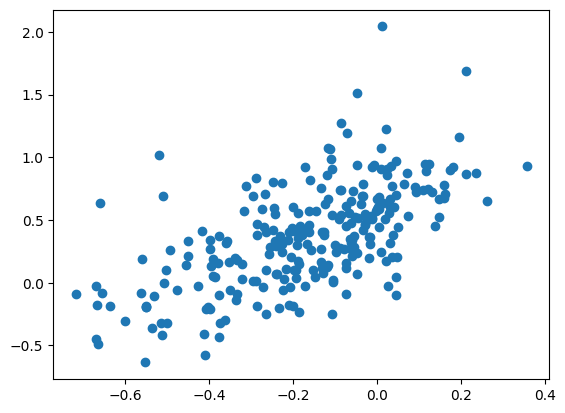

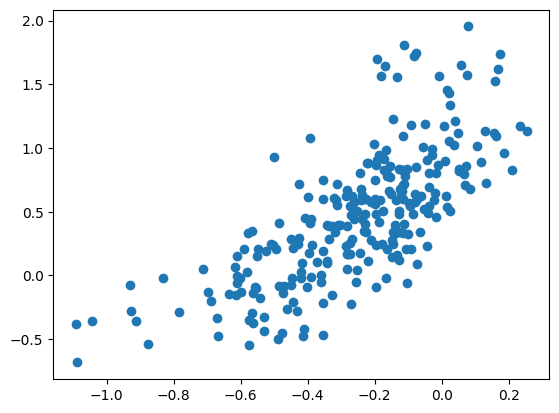

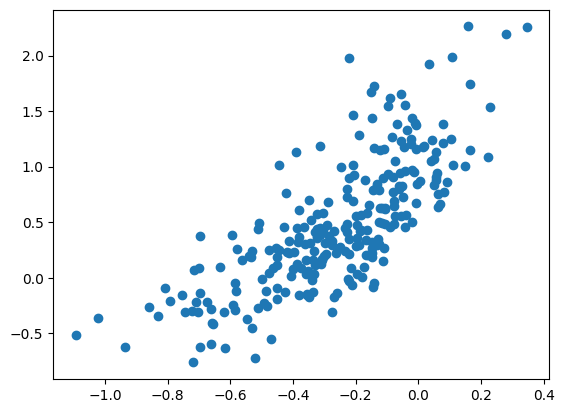

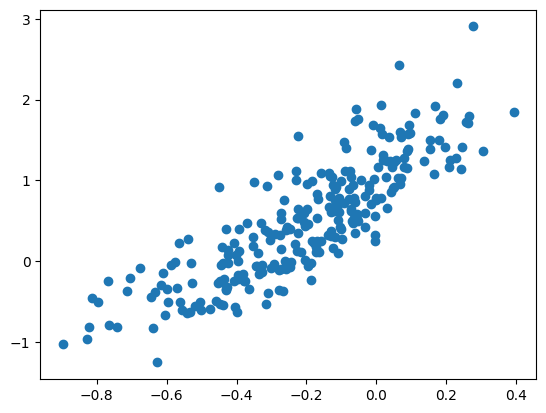

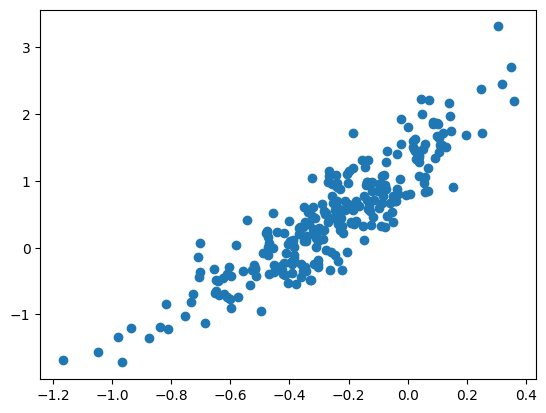

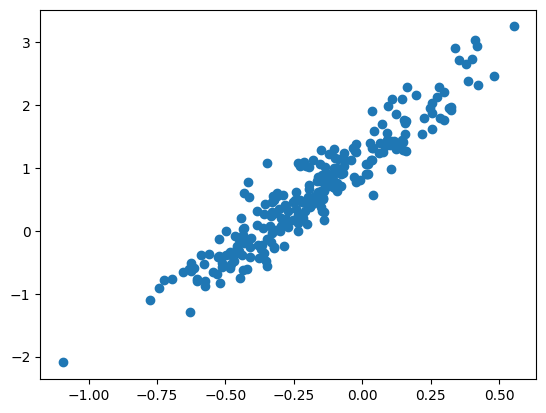

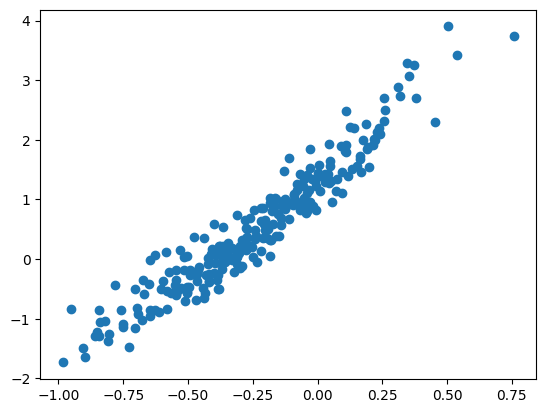

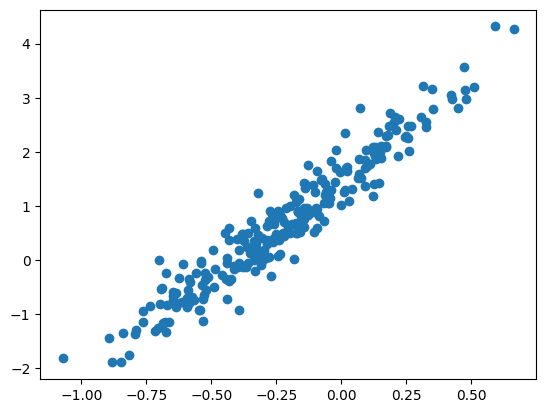

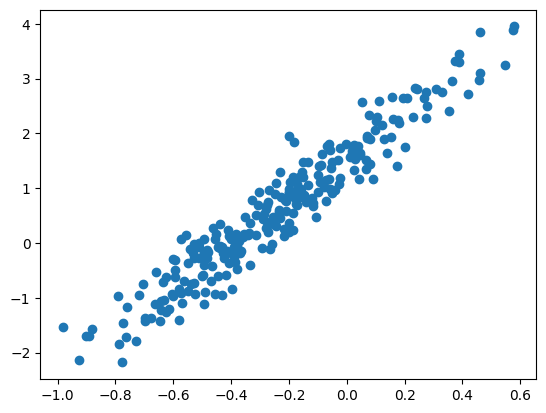

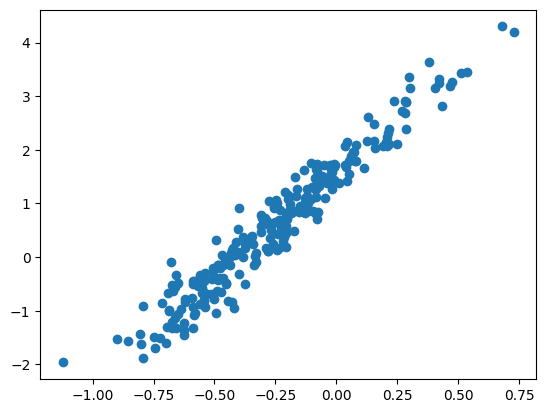

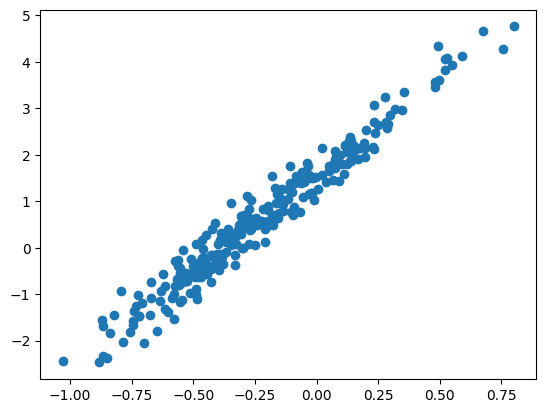

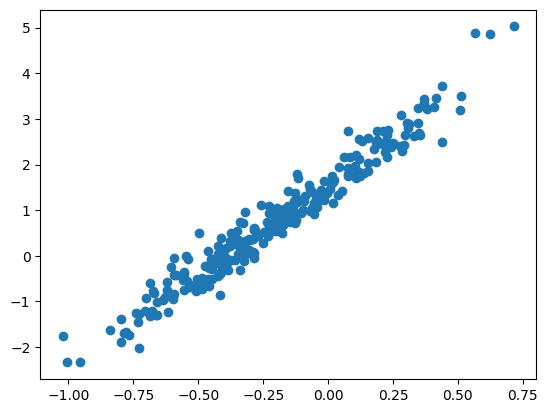

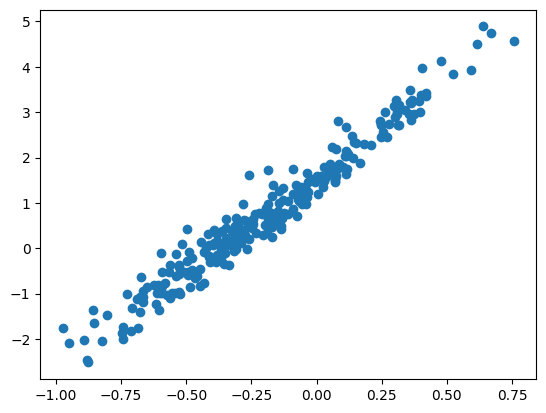

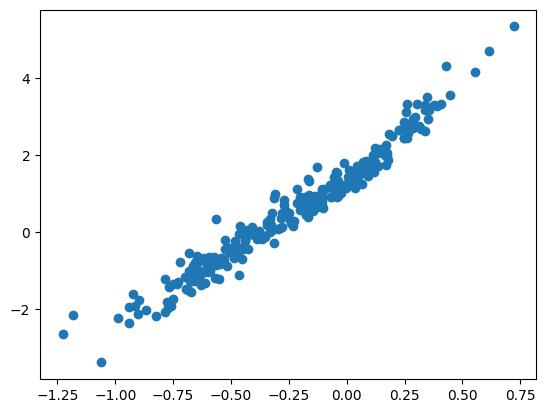

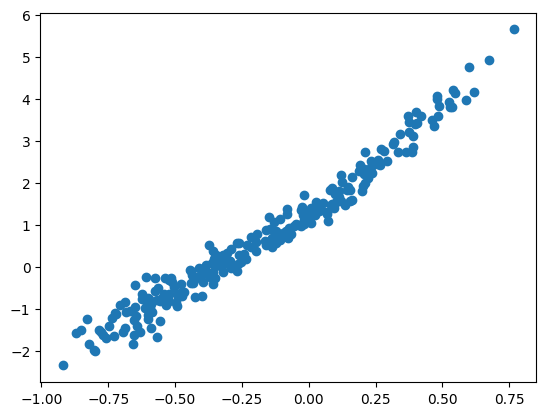

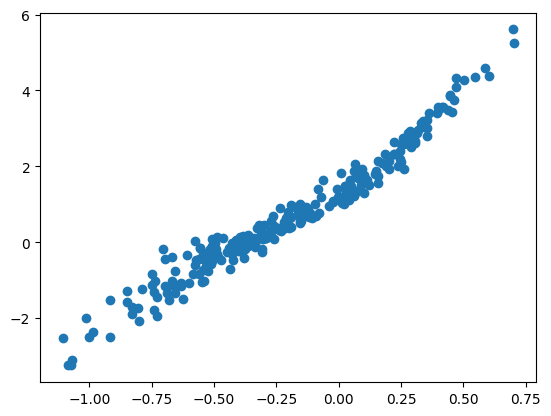

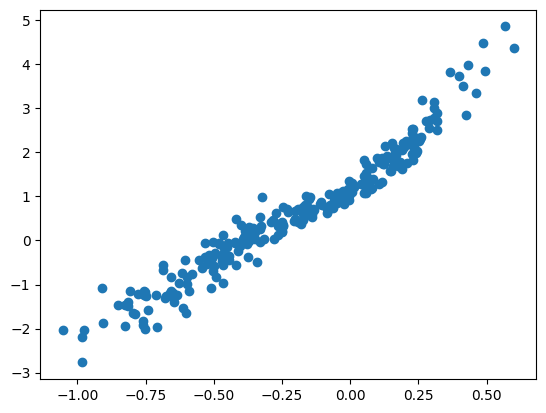

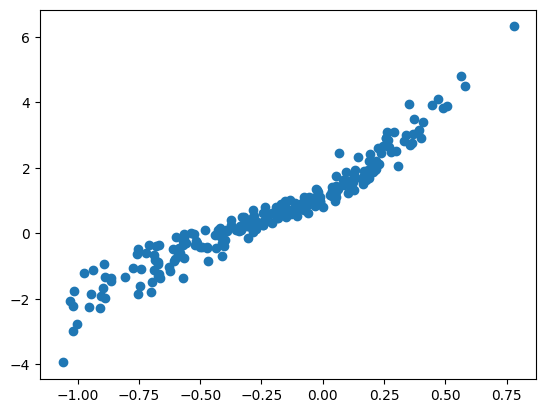

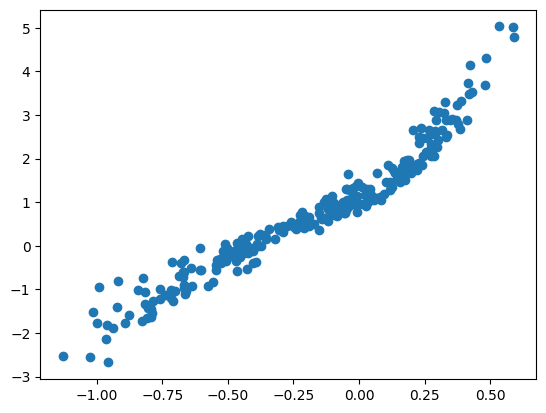

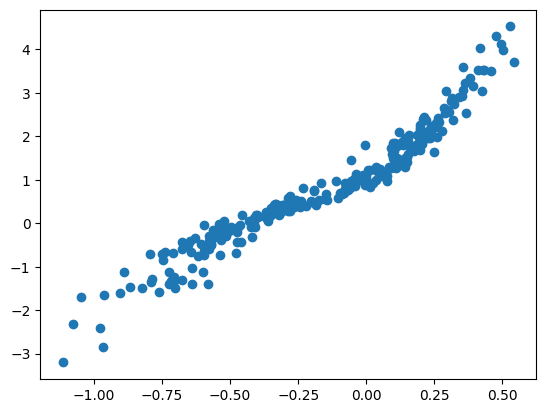

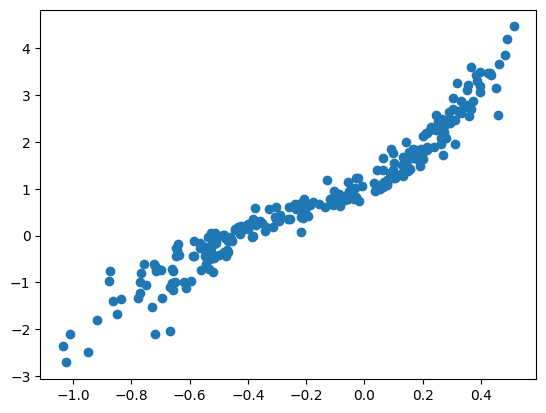

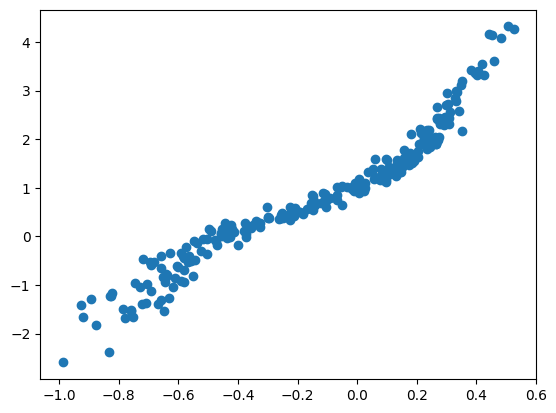

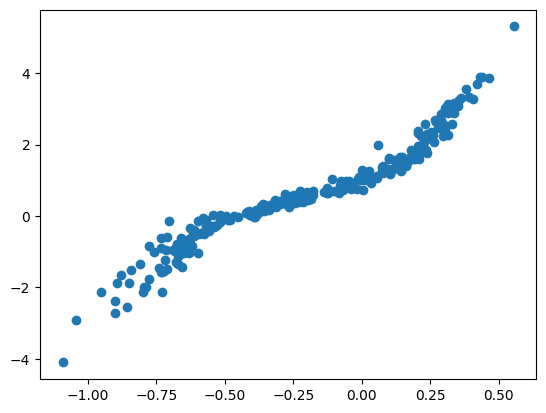

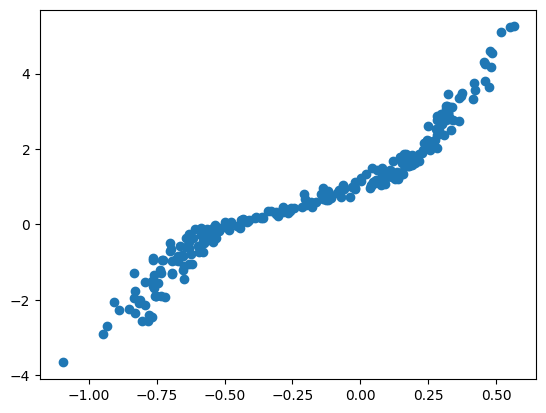

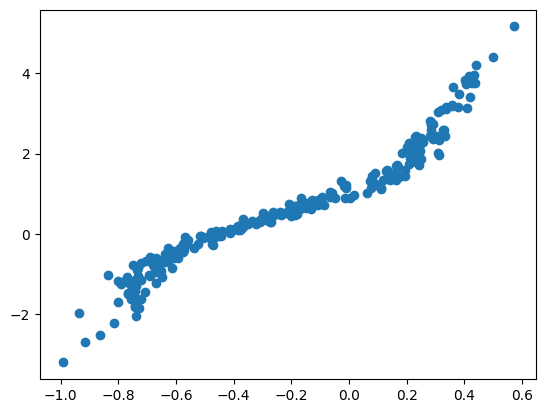

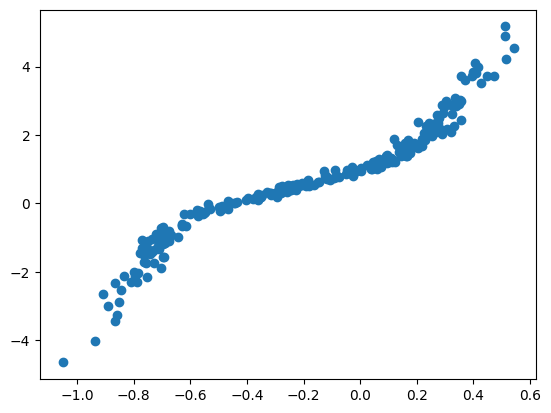

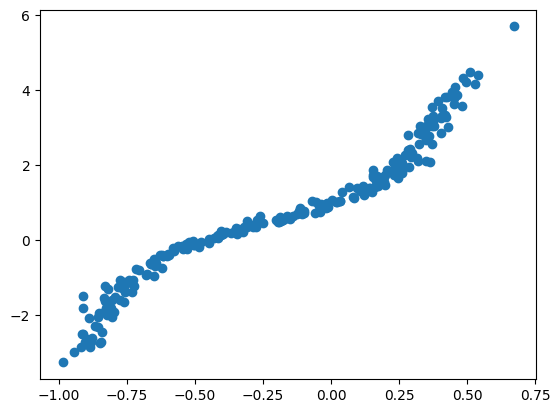

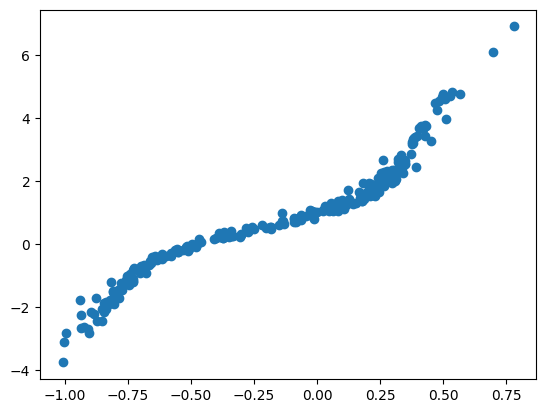

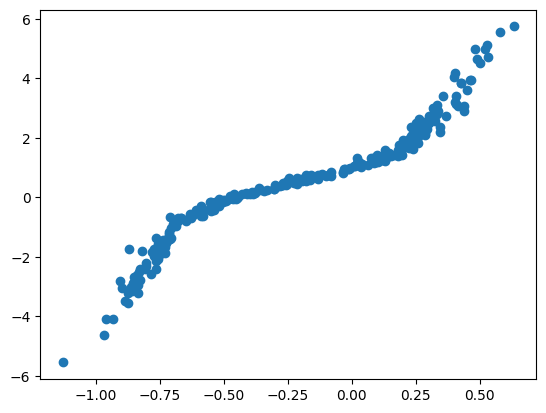

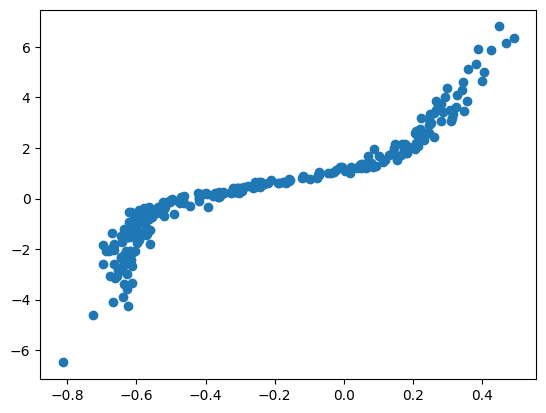

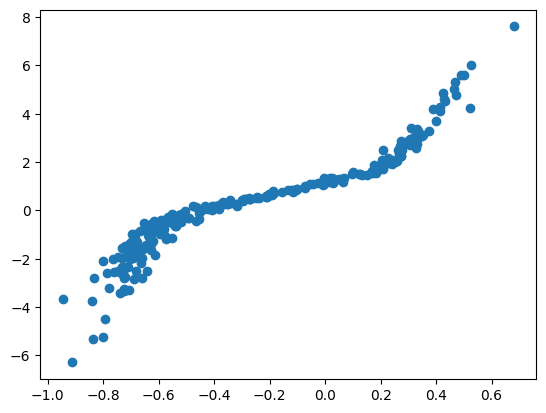

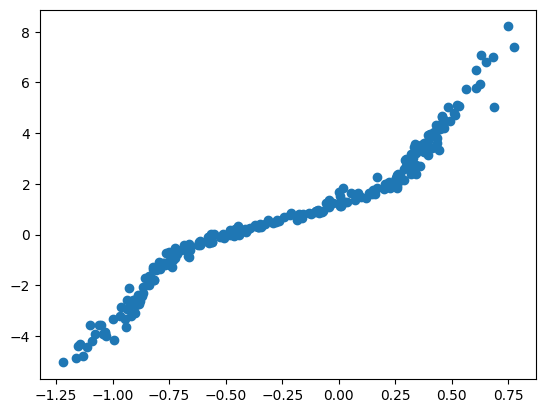

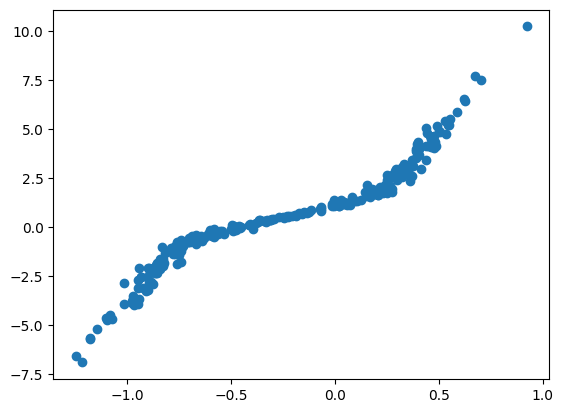

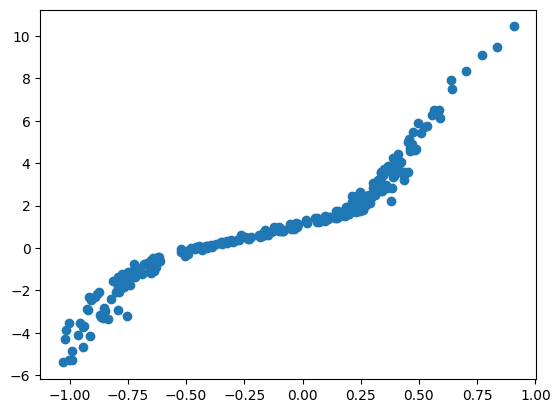

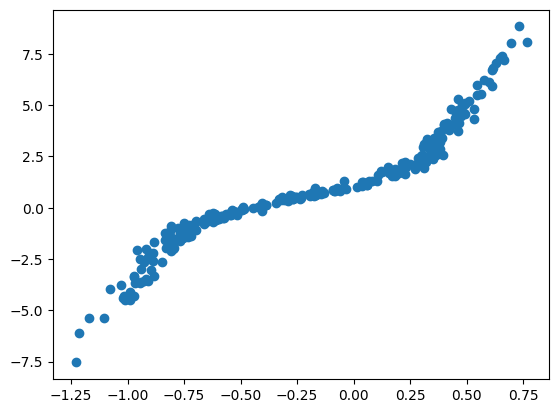

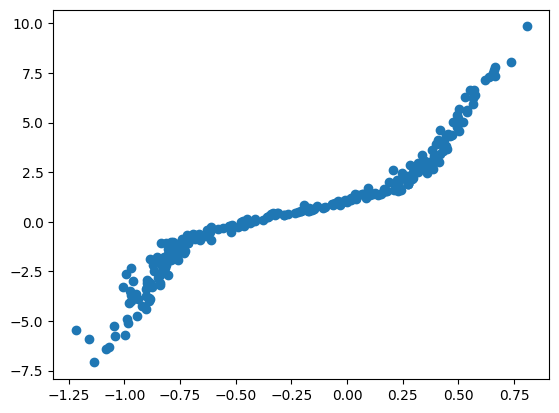

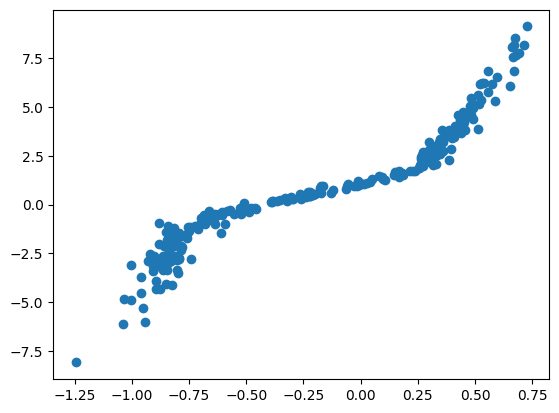

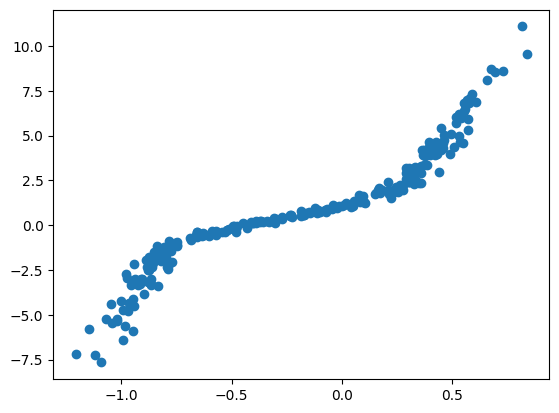

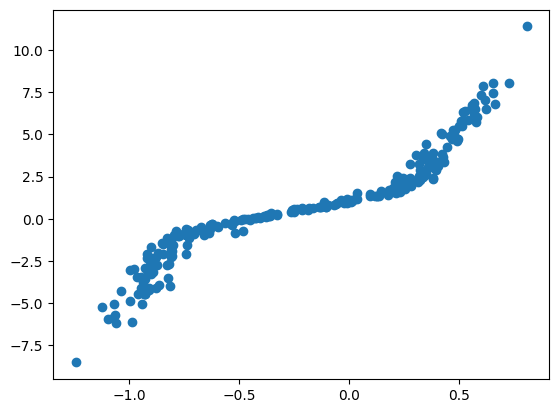

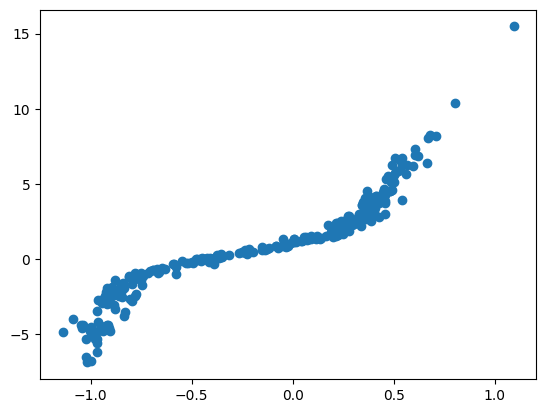

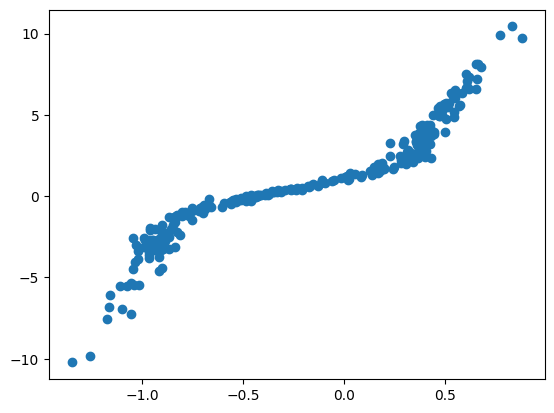

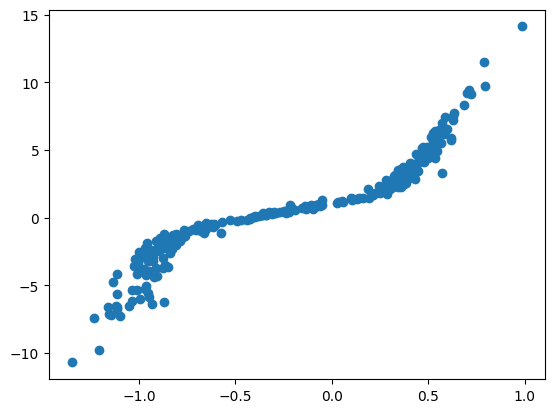

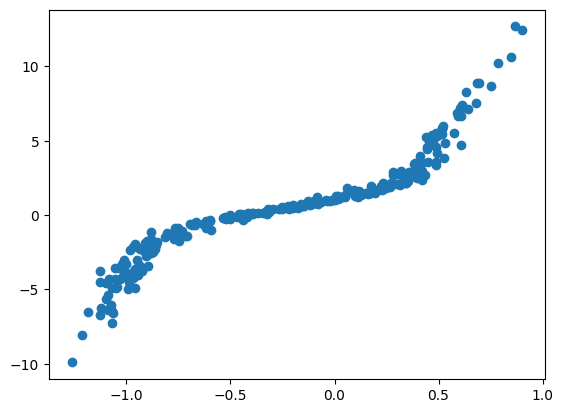

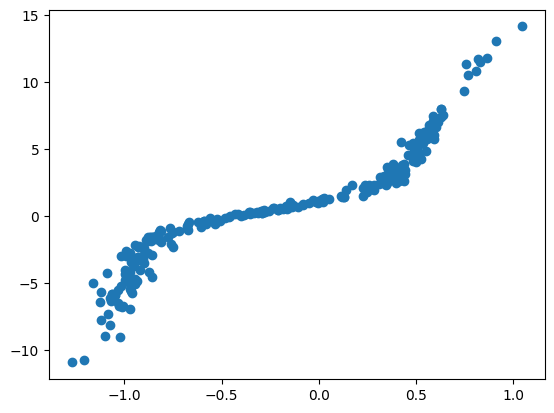

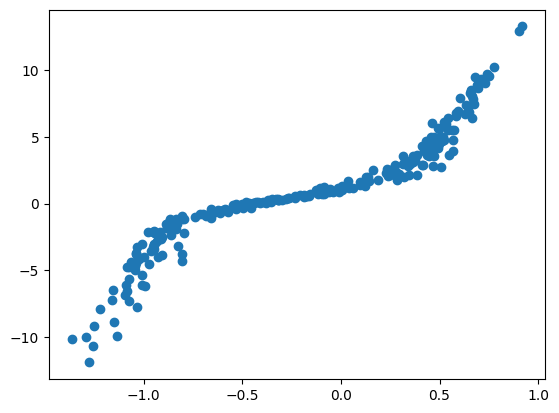

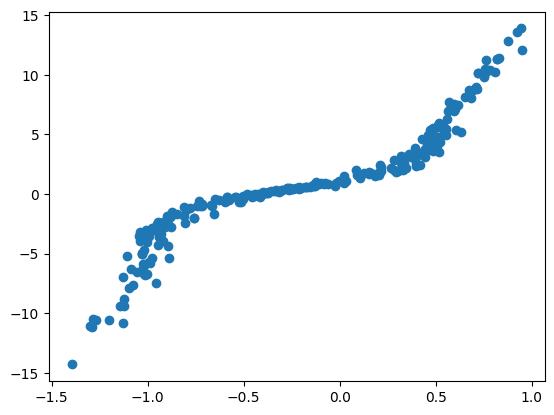

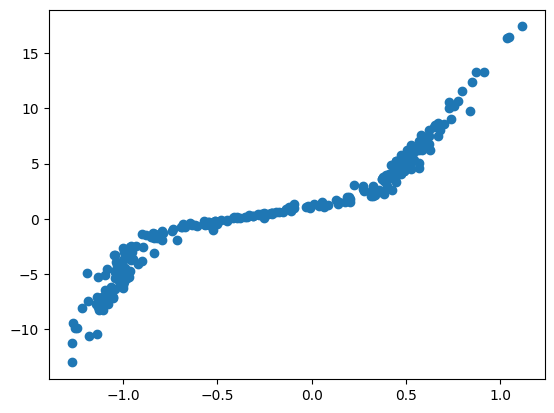

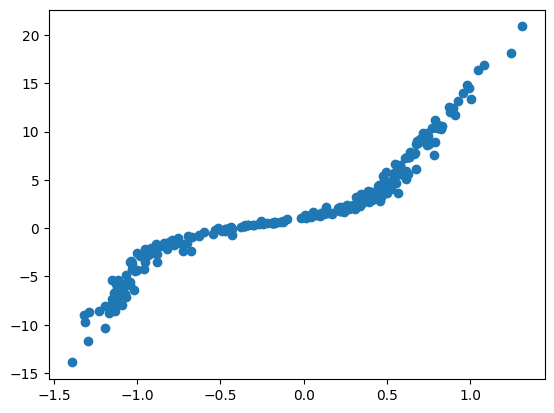

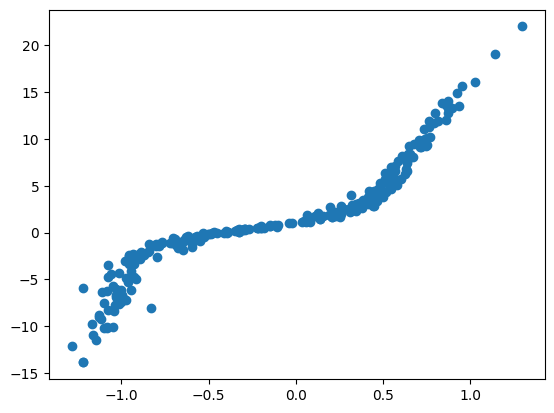

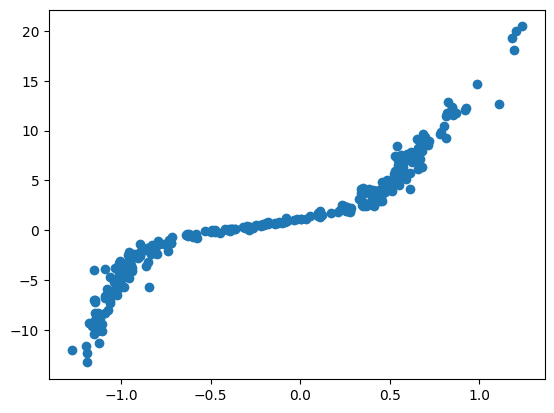

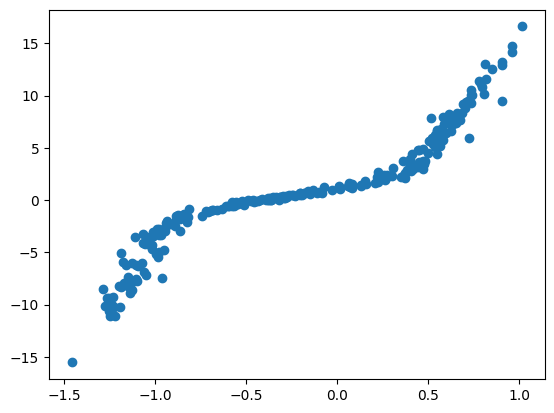

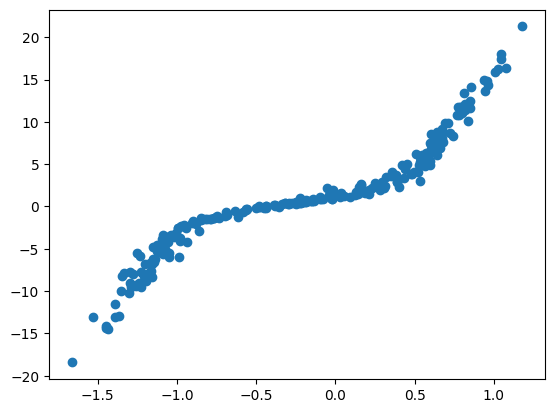

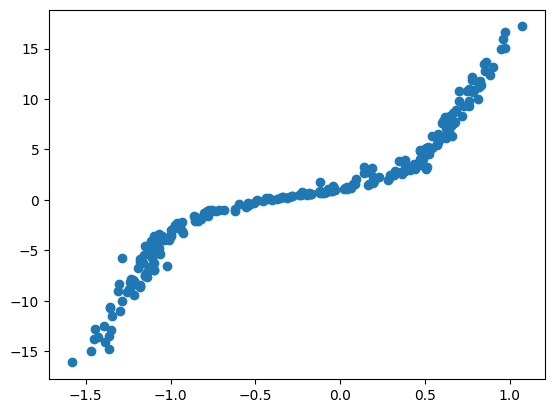

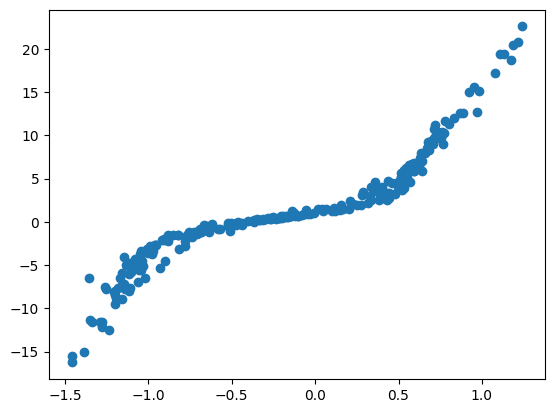

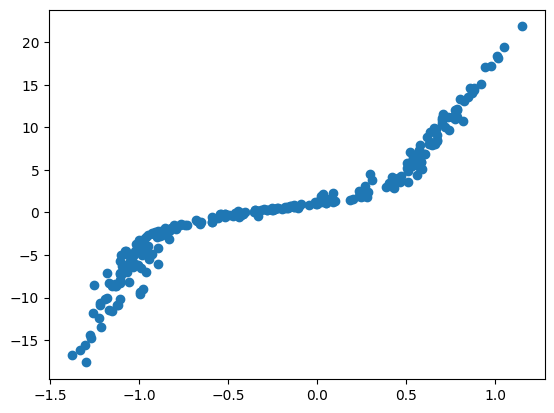

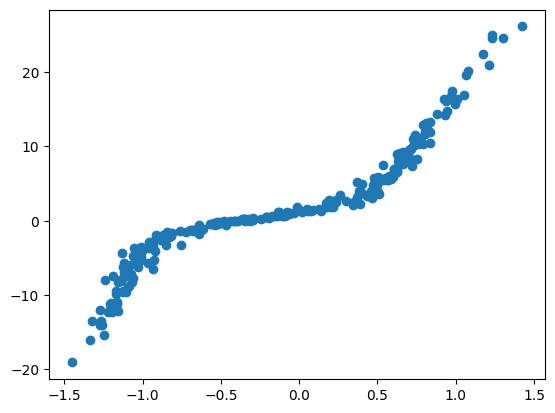

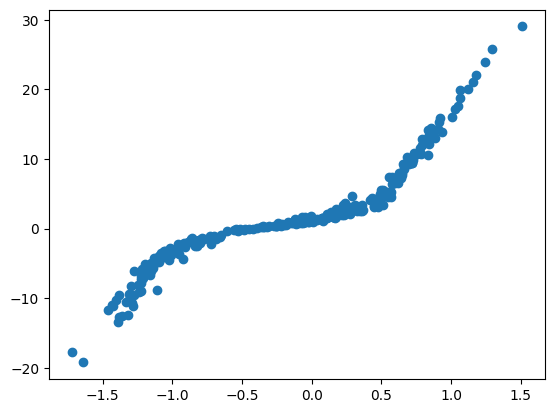

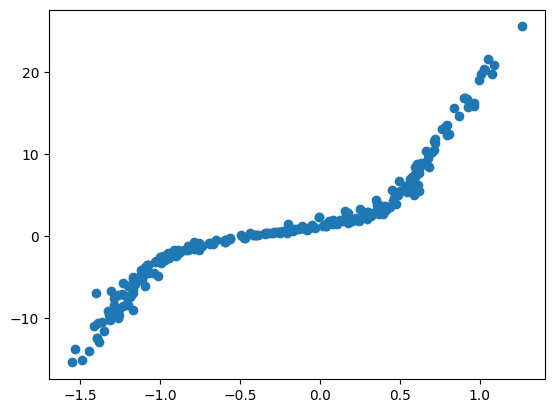

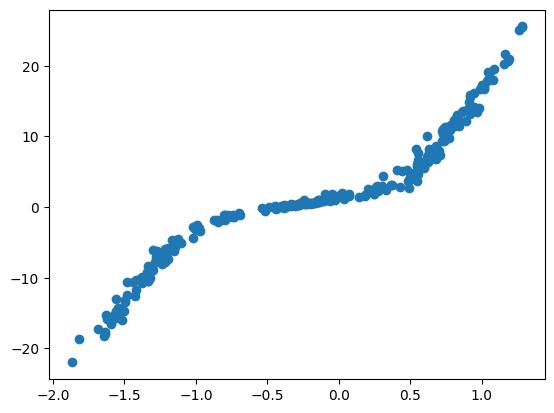

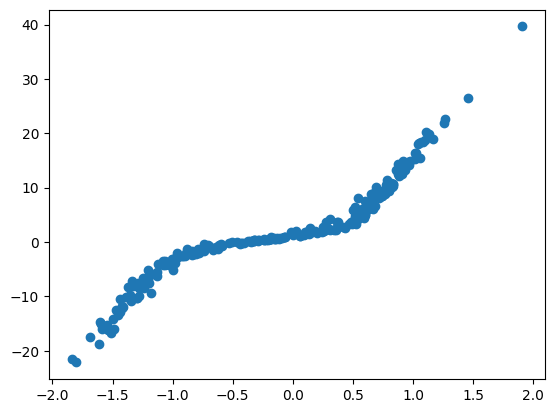

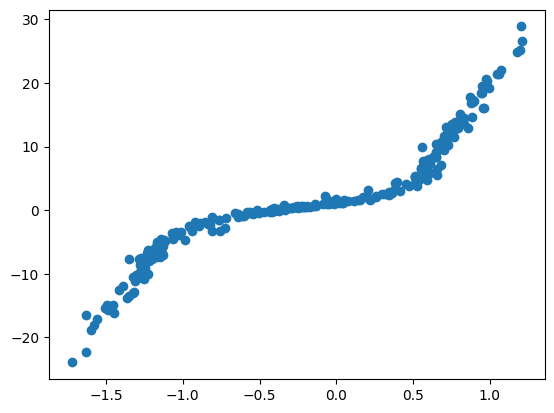

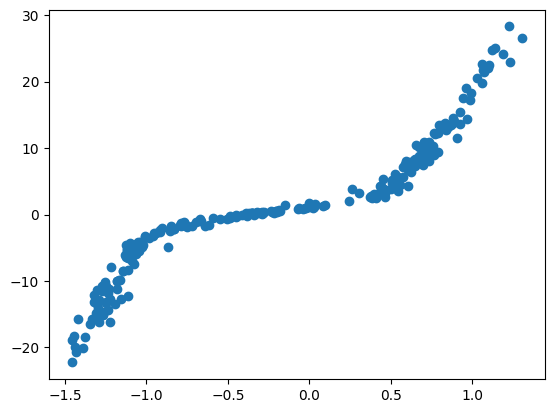

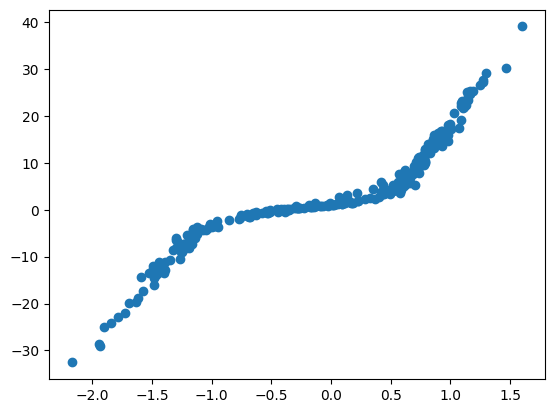

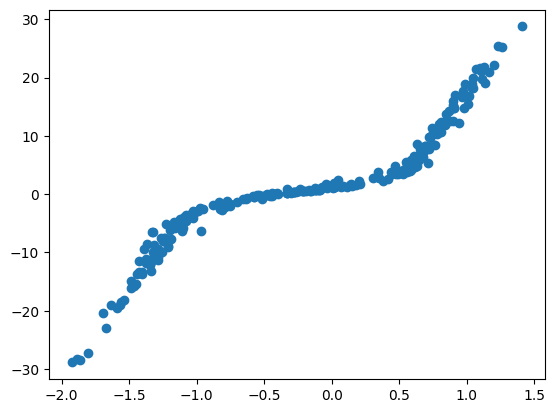

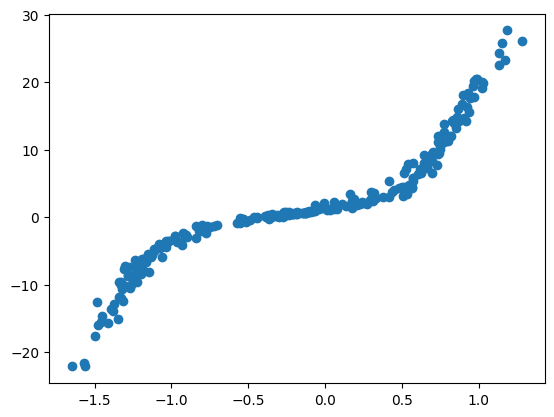

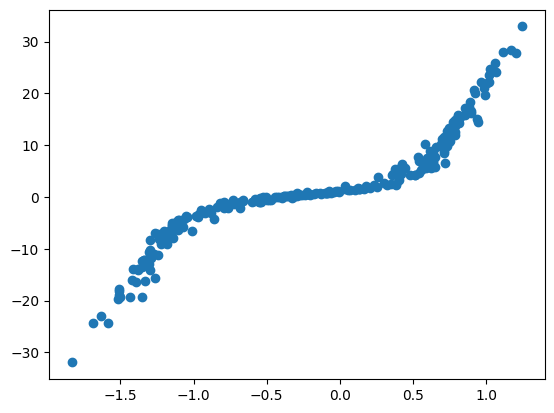

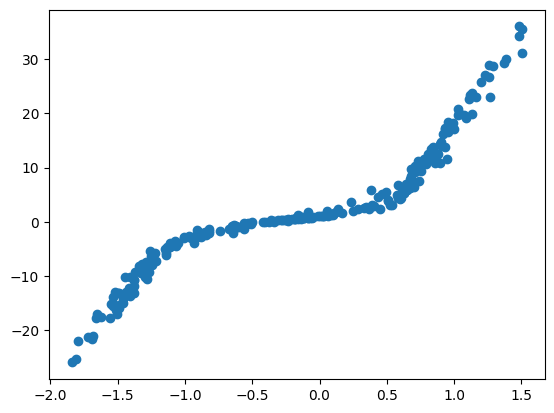

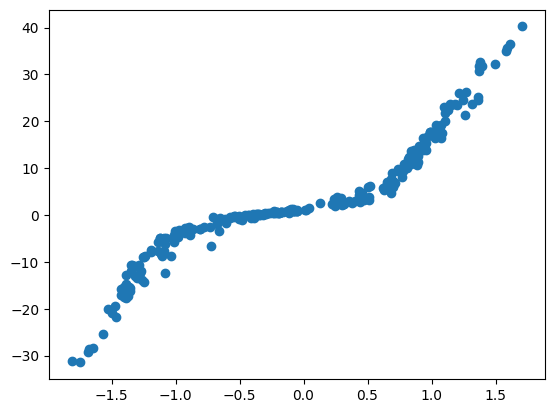

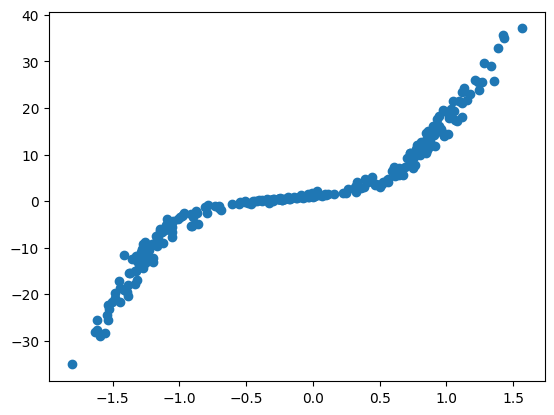

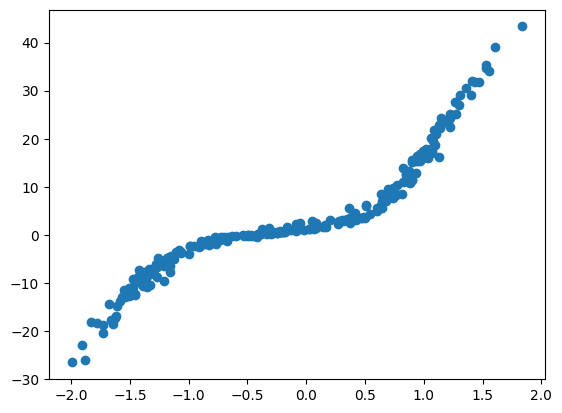

In [ ]:
num_epochs = 7500
latent_dim = 16
cd_model = Discriminator(2)
cg_model = Generator(latent_dim)
loss = nn.BCELoss()
d_optim = torch.optim.Adam(cd_model.parameters(), lr=0.001)
g_optim = torch.optim.Adam(cg_model.parameters(), lr=0.0001)

d_losses = []
g_losses = []

for epoch in range(num_epochs):
  real_data = data_generation('cubic')
  real_label = torch.ones(batch_s)
  latent_data = generate_noise_data(latent_dim)
  fake_data = cg_model(latent_data)
  fake_label = torch.zeros(batch_s)

  data = torch.cat((real_data, fake_data),0)
  label = torch.cat((real_label, fake_label),0)

  cd_model.zero_grad()
  output = cd_model(data).view(-1)
  d_loss = loss(output, label)

  d_loss.backward()
  d_optim.step()

  cg_model.zero_grad()
  latent_data = generate_noise_data(latent_dim)
  fake_data = cg_model(latent_data)
  output = cd_model(fake_data).view(-1)
  g_loss = loss(output, real_label)

  g_loss.backward()
  g_optim.step()


  # d_losses.append(d_loss)
  # g_losses.append(g_loss)

  if epoch%100==0:
    plot_data = cg_model(generate_noise_data(latent_dim=latent_dim))
    plt.scatter(plot_data[:,0].detach().numpy(), plot_data[:,1].detach().numpy())
    plt.show()

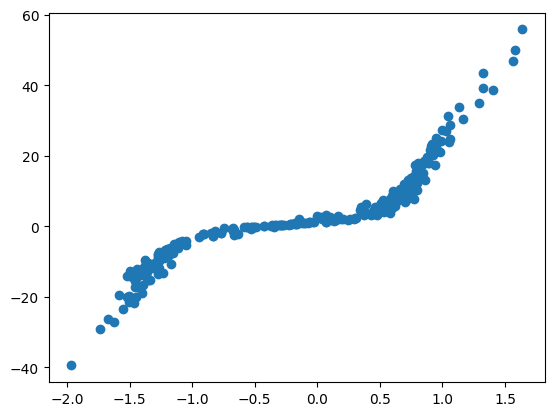

In [ ]:
fake_data = cg_model(generate_noise_data(latent_dim=latent_dim))
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy())
plt.show()

In [ ]:
real_data = data_generation('cubic')
for _ in range(19):
  real_data = torch.cat((real_data,data_generation('cubic')),0)
real_data.shape

torch.Size([5120, 2])

In [ ]:
fake_data = cg_model(generate_noise_data(latent_dim=latent_dim))
for _ in range(19):
  fake_data = torch.cat((fake_data,cg_model(generate_noise_data(latent_dim=latent_dim))),0)
fake_data.shape

torch.Size([5120, 2])

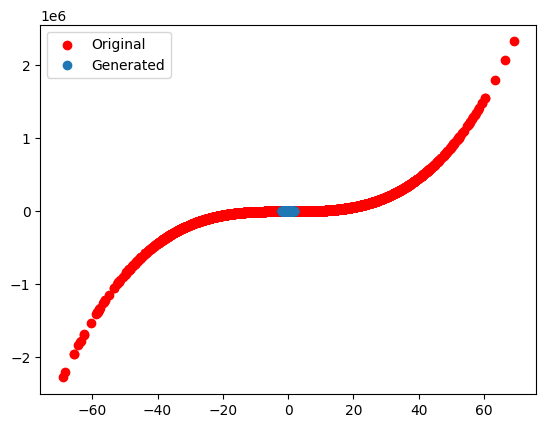

In [ ]:
plt.scatter(real_data[:,0], real_data[:,1],c='r', label='Original')
plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,1].detach().numpy(),label='Generated')
plt.legend()
plt.show()